<a href="https://colab.research.google.com/github/YaraAlnaggar/cs294-158-sp19_assignments/blob/master/assignment1/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
% matplotlib inline

## 1 Warmup

In [0]:
def sample_data():
    count = 10000
    rand = np.random.RandomState(0)
    a = 0.3 + 0.1 * rand.randn(count)
    b = 0.8 + 0.05 * rand.randn(count)
    mask = rand.rand(count) < 0.5
    samples = np.clip(a * mask + b * (1 - mask), 0.0, 1.0)
    return np.digitize(samples, np.linspace(0.0, 1.0, 100))


In [0]:
class dataset_sample_data(torch.utils.data.Dataset):
  def __init__(self, sample_data):
    super(dataset_sample_data).__init__()
    self.sample_data = sample_data
  def __getitem__(self, index):
    return self.sample_data[index]
    
  def __len__(self):
    return len(self.sample_data)

In [0]:
samples = sample_data()
theta = torch.zeros(100,requires_grad = True, dtype = torch.double)

In [0]:
manual_seed = 100
num_epochs = 1400
batch_sz = 1000
test_ratio = 0.2
val_ratio  = 0.2
test_slice = int(len(samples)*test_ratio)
val_slice = test_slice+int(len(samples)*val_ratio)
steps_per_epoch = int(len(samples) * 0.6 / batch_sz)
np.random.seed(manual_seed)

In [0]:
indices = np.arange(len(samples))
test_indices, val_indices, train_indices  = indices[:test_slice] , indices[test_slice:val_slice], indices[val_slice:] 
train_sampler = SubsetRandomSampler(train_indices)

In [0]:
dataset = dataset_sample_data(samples)
train_loader = DataLoader(dataset, batch_size= batch_sz, sampler = train_sampler)
val_loader = DataLoader(dataset, batch_size=int(len(samples)*val_ratio), sampler = val_sampler)

In [0]:
model = torch.nn.LogSoftmax()
loss = torch.nn.NLLLoss(reduction='mean')
optimizer = torch.optim.Adam([theta])

In [254]:
# training loop
train_loss, val_loss = [],[]
for epoch in range(num_epochs):
  minibatch_loss = 0
  for i, sample in enumerate(train_loader,0):
    optimizer.zero_grad()
    pred = model(theta) 
    out_loss = loss(pred.repeat(sample.size()[0],1), sample)
    out_loss.backward()
    optimizer.step()
    minibatch_loss += out_loss.item()
    
  train_loss.append(minibatch_loss/steps_per_epoch)
  pred = model(theta)
  _loss = loss(pred.repeat(val_indices.shape[0],1), torch.from_numpy(samples[val_indices]) )
  val_loss.append(_loss)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Text(0.5, 1.0, 'negative log likelihood')

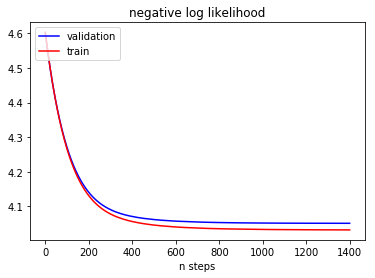

In [255]:
# training and validation graphs
plt.plot( val_loss, '-b', label='validation')
plt.plot( train_loss, '-r', label='train')
plt.xlabel("n steps")
plt.legend(loc='upper left')
plt.title("negative log likelihood")

In [269]:
# report test loss
pred = model(theta)
test_loss = loss(pred.repeat(test_indices.shape[0],1), torch.from_numpy(samples[test_indices]) )
print("Test neagtive likelihood : ",test_loss.item())

Test neagtive likelihood :  4.048319078897564


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


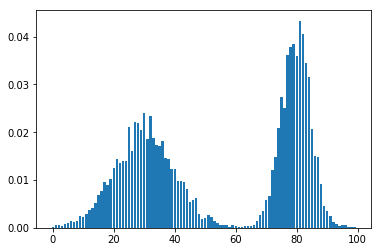

In [256]:
# model plot
model_final = torch.nn.functional.softmax(theta)
model_final_ = model_final.detach().numpy()
_ = plt.bar(np.arange(100),model_final_)

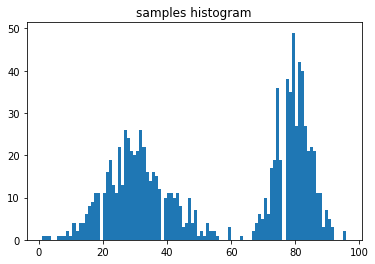

In [257]:
samples_model = np.random.choice(np.arange(0,100), size=1000, replace=True, p=mod_)
plt.hist(samples_model, bins=100)
_ = plt.title("samples histogram")

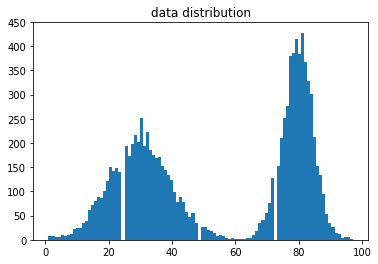

In [267]:
plt.hist(sample_data(), bins=100)
_ = plt.title("data distribution")

## 2 Two-dimensional data